### the basic questions
- in true spotify wrapped fashion... (jan 2023 onwards)
    - top 5 artists?
    - top 5 songs?
    - total minutes listened?

### deeper probing questions
- how have my top 5 artists changed across the last year? (2022 - 2023)
- is there an increasing or decreasing trend in the amount of music time listened to? (2022 - 2023)


In [2]:
# data preprocessing
import pandas as pd

# get total streaming history (earliest to latest dates) -----------------------
strm_hist_0 = pd.read_json('data/StreamingHistory0.json')
strm_hist_1 = pd.read_json('data/StreamingHistory1.json')

strm_hist_total = pd.concat([strm_hist_0, strm_hist_1])

strm_hist_total

,endTime,artistName,trackName,msPlayed
0,2022-12-17 07:06,keshi,skeletons,148449
1,2022-12-23 23:56,Kassy,Aching,74929
2,2022-12-25 00:52,DPR LIVE,Jasmine,6816
3,2022-12-25 00:56,Kassy,Aching,242048
4,2022-12-26 01:08,Kassy,Aching,176095
...,...,...,...,...
5557,2023-12-24 04:34,Clinton Kane,AVO TOAST,161461
5558,2023-12-24 04:37,Jessica Baio,at least,167502
5559,2023-12-24 04:41,Ed Sheeran,Merry Christmas,208546
5560,2023-12-24 04:44,Zach Hood,lonely isn't the word for this,167060


In [3]:
# data preprocessing continued

# get only the 2023 dates --------------------------------
# sort by date
current_year = strm_hist_total.sort_values(by='endTime')

# convert to datetime since it has an extended time format (y/m/d AND hr/min)
current_year['endTime'] = pd.to_datetime(current_year['endTime'], format='%Y-%m-%d %H:%M') 

# keep only the years, in a String format, to make filtering easier
current_year['endTime'] = current_year['endTime'].dt.strftime('%Y') 

# drop all rows with year 2022 (returns the indexes of the rows w/ year 2022)
index_of_drop_rows = current_year[
    # specify 2022 as a string not an integer 
    # b/c the years are now String objects (b/c of strftime)
    current_year['endTime'] == '2022' 
].index

current_year.drop(index_of_drop_rows, inplace=True)

current_year.head()

,endTime,artistName,trackName,msPlayed
74,2023,WINTER,ONCE AGAIN,41817
73,2023,AILEE,I′m Sorry,256173
75,2023,TWICE,Basics,176973
76,2023,Wonstein,Your Existence,204229
77,2023,iKON,LOVE SCENARIO,209648


In [4]:
# data preprocessing continued (part 3)

# get rid of the podcasts ------------------------------

# sort by the time played, longest to shortest
# in theory, podcasts should have the longest times, so sorting should allow us to see all 
sort_by_played = current_year.sort_values(by='msPlayed', ascending=False)

# drop the first 5 rows b/c they're podcasts
sort_by_played_drop_five = sort_by_played.iloc[5:] 

# drop the second row b/c also podcast
songs_only_current_year = sort_by_played_drop_five.drop(9909)

# turn the index into a new column
songs_only_current_year = songs_only_current_year.reset_index()

# delete the index column
songs_only_current_year = songs_only_current_year.drop(columns=['index'])

songs_only_current_year

,endTime,artistName,trackName,msPlayed
0,2023,Hozier,Eat Your Young,472904
1,2023,Jay Chou,稻香,393730
2,2023,JUNNY,MOVIE,361556
3,2023,Gracie Abrams,Right now,350836
4,2023,Sabrina 胡恂舞,You were.,328347
...,...,...,...,...
15405,2023,Tate McRae,you're so cool,0
15406,2023,TRI.BE,WONDERLAND - English Ver.,0
15407,2023,Swedish House Mafia,Moth To A Flame (with The Weeknd),0
15408,2023,Tate McRae,greedy,0


In [5]:
# the basic questions

# top 5 artists? -------------------------------
all_artists = songs_only_current_year['artistName'].value_counts() # currently a Series

# set a name for the first column (rename_axis) and rename the second column (reset_index)
all_artists_renamed = all_artists.rename_axis('Artist').reset_index(name='Number of Seconds Listened')

# create new dataframe with the top 5 results only
top_5_artists = all_artists_renamed.loc[:4]

top_5_artists_ascending = top_5_artists.sort_values(by='Number of Seconds Listened', ascending=True)
top_5_artists_ascending

,Artist,Number of Seconds Listened
4,Virginia To Vegas,374
3,Olivia Rodrigo,472
2,Taylor Swift,635
1,Patrick Brasca,752
0,Tate McRae,943


In [6]:
# top 5 songs? --------------------------------------
# make a new df w/ only the top 5 songs
top_5_songs = songs_only_current_year.loc[:4]

top_5_songs

,endTime,artistName,trackName,msPlayed
0,2023,Hozier,Eat Your Young,472904
1,2023,Jay Chou,稻香,393730
2,2023,JUNNY,MOVIE,361556
3,2023,Gracie Abrams,Right now,350836
4,2023,Sabrina 胡恂舞,You were.,328347


In [7]:
# total minutes listened? ---------------------------------
import math

total_milisecs = songs_only_current_year['msPlayed'].sum() # in milliseconds
total_secs = math.floor(total_milisecs/1000) # get seconds

print(f'{math.floor(total_secs/60)} minutes {round(total_secs % 60)} seconds') 

40304 minutes 27 seconds


In [26]:
# deeper probing questions

# how have my top 5 artists changed across the years? -----------------
# pull only the top 5 artists from the *original* 2022+ dataframe
selected_rows = []

for name in top_5_artists_ascending['Artist']:
    print(f"strm_hist_total['artistName'] == {name}")

selected_rows = (strm_hist_total['artistName'] == 'Tate McRae') | (strm_hist_total['artistName'] == 'Patrick Brasca') | (strm_hist_total['artistName'] == 'Taylor Swift') | (strm_hist_total['artistName'] == 'Olivia Rodrigo') | (strm_hist_total['artistName'] == 'Virginia to Vegas')

top_5_across_the_years = strm_hist_total.loc[selected_rows]

top_5_across_the_years


strm_hist_total['artistName'] == Virginia To Vegas
strm_hist_total['artistName'] == Olivia Rodrigo
strm_hist_total['artistName'] == Taylor Swift
strm_hist_total['artistName'] == Patrick Brasca
strm_hist_total['artistName'] == Tate McRae


,endTime,artistName,trackName,msPlayed
393,2023-01-19 05:11,Taylor Swift,Lavender Haze,5376
394,2023-01-19 05:15,Taylor Swift,"You're On Your Own, Kid",194206
395,2023-01-19 05:18,Taylor Swift,Question...?,22370
397,2023-01-19 05:18,Taylor Swift,Midnight Rain,174782
424,2023-01-19 06:38,Patrick Brasca,Don't Wanna Lie (feat. 8lak & Hosea),175144
...,...,...,...,...
5479,2023-12-23 18:37,Tate McRae,run for the hills,7572
5482,2023-12-23 18:47,Tate McRae,run for the hills,143940
5510,2023-12-23 19:59,Tate McRae,run for the hills,143940
5526,2023-12-23 23:34,Tate McRae,run for the hills,20339


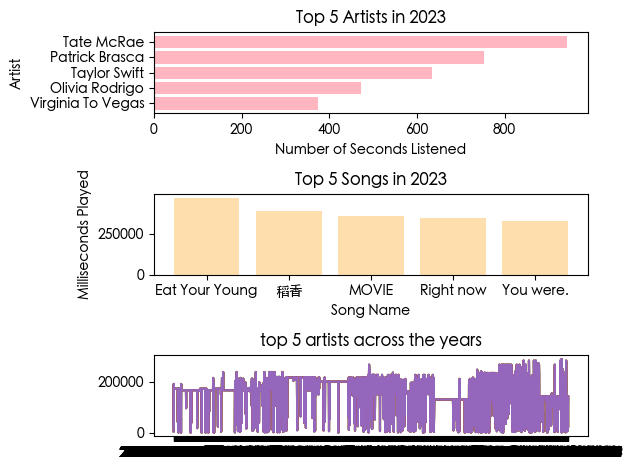

In [27]:
# data visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager

# allow for chinese characters
matplotlib.rcParams['font.family'] = ['Heiti TC']

# allow for 2 plots, adjust spacing between plots
fig, (ax1, ax2, ax3) = plt.subplots(3)

# top 5 artists -----------------------------
ax1.set_title('Top 5 Artists in 2023')
ax1.set_xlabel('Number of Seconds Listened')
ax1.set_ylabel('Artist')
ax1.barh(top_5_artists_ascending['Artist'], 
         top_5_artists_ascending['Number of Seconds Listened'],
         color='lightpink')

# top 5 songs -------------------------------
ax2.set_title('Top 5 Songs in 2023')
ax2.set_xlabel('Song Name')
ax2.set_ylabel('Milliseconds Played')
ax2.bar(top_5_songs['trackName'],
         top_5_songs['msPlayed'],
         color='navajowhite')

# top 5 artists changing --------------------
ax3.set_title('top 5 artists across the years')
for artist in top_5_artists_ascending['Artist']:
    ax3.plot(top_5_across_the_years['endTime'],
             top_5_across_the_years['msPlayed'], label=artist)

plt.tight_layout() # space out subplots
plt.show()
